1. Basic Data Exploration 

A. What is the size of the dataset? Additionally, determine the number of rows and columns in each sheet.

In [2]:
# Part A

import os

def get_size(path):
    # Initialize the total size
    total_size = 0
    
    # Walk through the directory and its subdirectories
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            total_size += os.path.getsize(file_path)
    
    # Convert the size to human-readable format
    total_size_bytes = total_size
    total_size_kbytes = total_size / 1024
    total_size_mbytes = total_size_kbytes / 1024
    total_size_gbytes = total_size_mbytes / 1024

    return total_size_bytes, total_size_kbytes, total_size_mbytes, total_size_gbytes


directory_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'

total_bytes, total_kbytes, total_mbytes, total_gbytes = get_size(directory_path)

print(f"Size in bytes: {total_bytes} bytes")
print(f"Size in kilobytes: {total_kbytes:.2f} KB")
print(f"Size in megabytes: {total_mbytes:.2f} MB")
print(f"Size in gigabytes: {total_gbytes:.2f} GB")


# Part B

import pandas as pd

# Read "data1" sheet
sheet_name_data1 = 'data1'
df_data1 = pd.read_excel(directory_path, sheet_name=sheet_name_data1)

# Get the number of rows and columns for "data1"
num_rows_data1, num_columns_data1 = df_data1.shape

print(f"Number of rows in Data 1: {num_rows_data1}")
print(f"Number of columns in Data 1: {num_columns_data1}")

# Read "data2" sheet
sheet_name_data2 = 'data2'
df_data2 = pd.read_excel(directory_path, sheet_name=sheet_name_data2)

# Get the number of rows and columns for "data2"
num_rows_data2, num_columns_data2 = df_data2.shape

print(f"Number of rows in Data 2: {num_rows_data2}")
print(f"Number of columns in Data 2: {num_columns_data2}")

Size in bytes: 0 bytes
Size in kilobytes: 0.00 KB
Size in megabytes: 0.00 MB
Size in gigabytes: 0.00 GB
Number of rows in Data 1: 8771
Number of columns in Data 1: 19
Number of rows in Data 2: 3322
Number of columns in Data 2: 5


B. What is the total number of misssing values in the data ?

In [3]:
sheet_name_mv_data1 = 'data1'
count_missing_values_data1 = pd.read_excel(directory_path, sheet_name=sheet_name_mv_data1)

missing_values_data1 = count_missing_values_data1.isnull().sum()

total_missing_data1 = missing_values_data1.sum()

print("Missing values in each column of Data 1:")
print(missing_values_data1)

print("Total number of missing values in Data 1:",total_missing_data1)

Missing values in each column of Data 1:
id                           1
date                         1
threat_type                 48
flee_status               1192
armed_with                 211
city                        59
county                    4857
state                        1
latitude                   990
longitude                  990
location_precision         990
name                       584
age                        606
gender                      50
race                      1407
race_source               1386
mental_illness_related       1
body_camera                  1
agency_ids                   1
dtype: int64
Total number of missing values in Data 1: 13376


In [4]:
sheet_name_mv_data2 = 'data2'
count_missing_values_data2 = pd.read_excel(directory_path, sheet_name=sheet_name_mv_data2)

missing_values_data2 = count_missing_values_data2.isnull().sum()

total_missing_data2 = missing_values_data2.sum()

print("Missing values in each column of Data 2:")
print(missing_values_data2)

print("Total number of missing values in Data 2:",total_missing_data2)

Missing values in each column of Data 2:
id                 0
name               0
type               0
state              0
total_shootings    0
dtype: int64
Total number of missing values in Data 2: 0


C. What is the range of dates in the dataset?

In [8]:
import pandas as pd

# Specify the path to your Excel file and the sheet name
directory_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'  # Replace with the actual path to your Excel file
sheet_name = 'data1'

# Load the specified sheet into a DataFrame
df = pd.read_excel(directory_path, sheet_name='data1')

# Check if 'date' is in the columns
if 'date' in df.columns:
    # Convert the 'date' column to a datetime format (typo fixed)
    df['date'] = pd.to_datetime(df['date'])

    # Find the range of dates
    min_date = df['date'].min()
    max_date = df['date'].max()

    print("Minimum Date:", min_date)
    print("Maximum Date:", max_date)
else:
    print("No 'date' column found in the sheet.")

Minimum Date: 2015-01-02 00:00:00
Maximum Date: 2023-10-07 00:00:00


2. Demographic Analysis 

A. What is the median age of all individuals shot by police? Which age bracket are most likely to be shot by police ? 

Median Age of All Individuals: 35.0


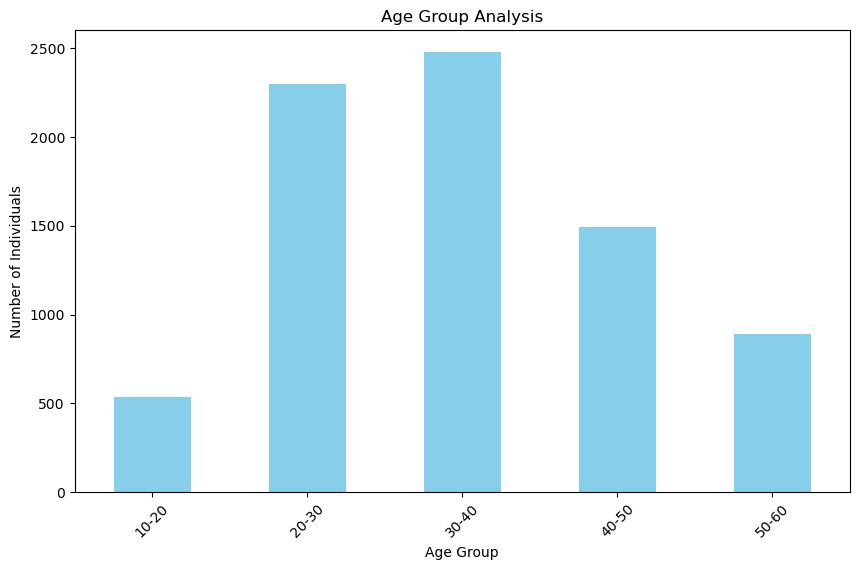

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
directory_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'
sheet_name = 'data1'
df = pd.read_excel(directory_path, sheet_name=sheet_name)

# Calculate the median age of all individuals
median_age = df['age'].median()
print("Median Age of All Individuals:", median_age)

# Create age groups
age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60']

# Cut the age data into age groups
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Count the number of individuals in each age group
age_group_counts = df['Age Group'].value_counts().sort_index()

# Create a bar graph to analyze age groups
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Age Group Analysis')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=45)
plt.show()

B. What is the median age for each race, and in which age brackets do individuals within each race fall?

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
directory_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'
sheet_name = 'data1'
df = pd.read_excel(directory_path, sheet_name=sheet_name)

# Define the race percentages
race_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Calculate the number of individuals based on the race percentages
total_individuals = len(df)
race_counts = {race: int(total_individuals * (percentage / 100)) for race, percentage in race_percentages.items()}

# Filter the DataFrame to include only specified races (W, B, H, A)
df = df[df['race'].isin(race_counts.keys())]

# Drop rows with missing 'age' values
df = df.dropna(subset=['age'])

# Create age groups
age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60']

# Cut the age data into age groups for each race category
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Count the number of individuals in each age group by race
age_group_counts_by_race = df.groupby(['race', 'Age Group'])['name'].count().unstack().fillna(0)

# Adjust the counts based on the race percentages
for race in race_counts:
    age_group_counts_by_race.loc[race] *= race_counts[race] / age_group_counts_by_race.loc[race].sum()

# Calculate the median age for each race
median_age_by_race = df.groupby('race')['age'].median()

# Print the median age for each race
print("Median Age by Race:")
print(median_age_by_race)


Median Age by Race:
race
A    34.5
B    31.0
H    33.0
W    38.0
Name: age, dtype: float64


Shot Rate per Capita by Race:
{'W': 0.6608594657375145, 'B': 1.575503355704698, 'H': 0.7456716417910447, 'A': 0.2536231884057971}


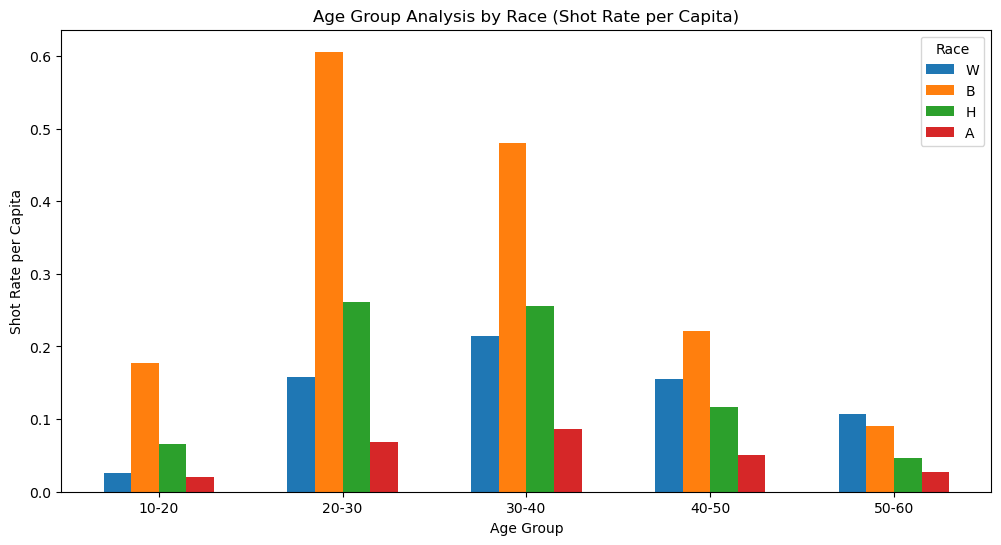

In [79]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
directory_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'
sheet_name = 'data1'
df = pd.read_excel(directory_path, sheet_name=sheet_name)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Filter the DataFrame to include only specified races (W, B, H, A)
selected_races = ['W', 'B', 'H', 'A']
df = df[df['race'].isin(selected_races)]

# Drop rows with missing 'age' values
df = df.dropna(subset=['age'])

# Create age groups
age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60']

# Cut the age data into age groups for each race category
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Count the number of individuals in each age group by race
age_group_counts_by_race = df.groupby(['race', 'Age Group'])['name'].count().unstack().fillna(0)

# Calculate the shot rate per capita for each race
shot_rate_by_race = {race: age_group_counts_by_race.loc[race].sum() / expected_counts[race] for race in selected_races}

# Print the shot rate per capita for each race
print("Shot Rate per Capita by Race:")
print(shot_rate_by_race)

# Create a grouped bar chart
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.15
x = range(len(age_labels))

for i, race in enumerate(selected_races):
    age_group_counts = age_group_counts_by_race.loc[race]
    ax.bar([pos + width * i for pos in x], age_group_counts / expected_counts[race], width=width, label=race)

ax.set_xticks([pos + width * (len(selected_races) - 1) / 2 for pos in x])
ax.set_xticklabels(age_labels)
plt.title('Age Group Analysis by Race (Shot Rate per Capita)')
plt.xlabel('Age Group')
plt.ylabel('Shot Rate per Capita')
plt.legend(title='Race')
plt.show()


C. How is the data distributed on the basis on race and gender ?

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
directory_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'
sheet_name = 'data1'
df = pd.read_excel(directory_path, sheet_name=sheet_name)

# Filter the DataFrame to include only specified races (W, B, A, H)
selected_races = ['W', 'B', 'A', 'H']
df = df[df['race'].isin(selected_races)]

# Drop rows with missing 'age', 'race', or 'gender' values
df = df.dropna(subset=['race', 'age', 'gender'])

# Create age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

# Cut the age data into age groups for each race category
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Count the number of individuals in each age group by race and gender
age_group_counts_by_race_gender = df.groupby(['race', 'gender', 'Age Group'])['name'].count().unstack().fillna(0)

# Calculate the median age for each race and gender combination
median_age_by_race_gender = df.groupby(['race', 'gender'])['age'].median()

# Print the median age for each race and gender combination
print("Median Age by Race and Gender:")
print(median_age_by_race_gender)


Median Age by Race and Gender:
race  gender
A     female    47.0
      male      34.0
B     female    31.0
      male      31.0
H     female    31.0
      male      33.0
W     female    39.0
      male      38.0
Name: age, dtype: float64


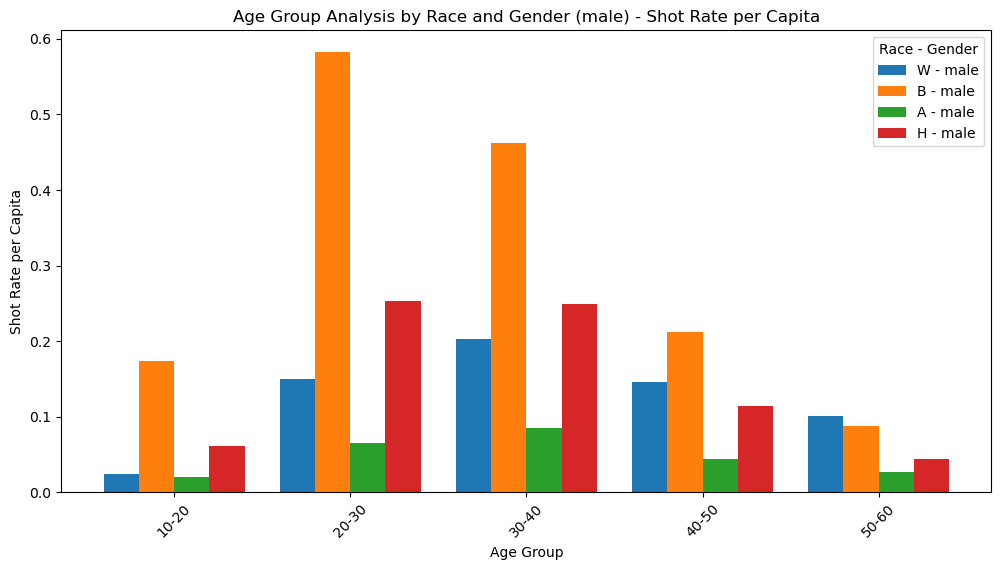

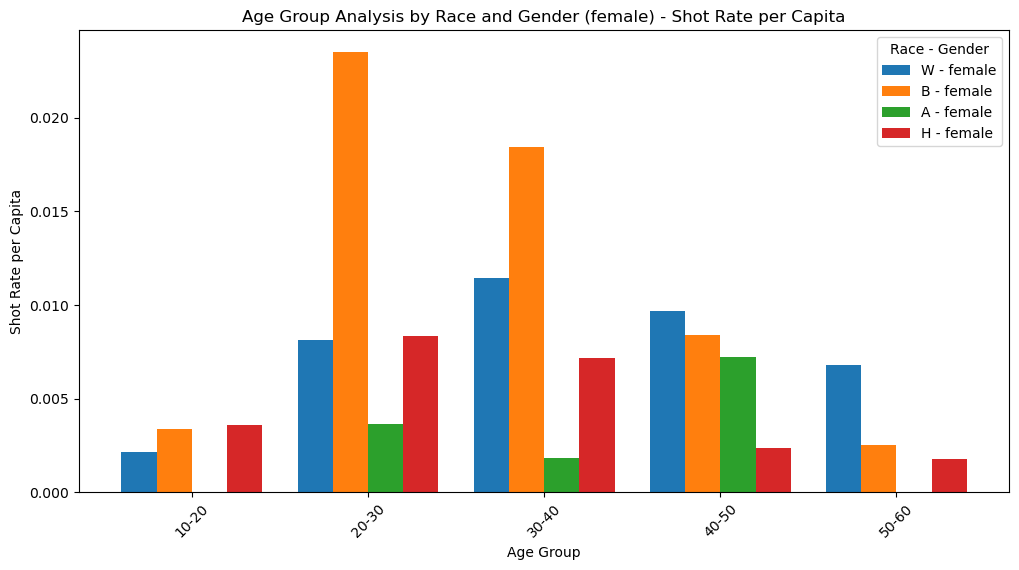

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
directory_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'
sheet_name = 'data1'
df = pd.read_excel(directory_path, sheet_name=sheet_name)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Filter the DataFrame to include only specified races (W, B, A, H)
selected_races = ['W', 'B', 'A', 'H']
df = df[df['race'].isin(selected_races)]

# Drop rows with missing 'age', 'race', or 'gender' values
df = df.dropna(subset=['race', 'age', 'gender'])

# Create age groups
age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60']

# Cut the age data into age groups for each race category
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Count the number of individuals in each age group by race and gender
age_group_counts_by_race_gender = df.groupby(['race', 'gender', 'Age Group'])['name'].count().unstack().fillna(0)

# Calculate the shot rate per capita for each race and gender
shot_rate_by_race_gender = {race: age_group_counts_by_race_gender.loc[(race)].sum() / expected_counts[race] for race in selected_races}


# Create grouped bar charts for different genders
for gender in df['gender'].unique():
    gender_df = df[df['gender'] == gender]
    
    # Create a grouped bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    width = 0.2
    x = range(len(age_labels))
    
    for i, race in enumerate(selected_races):
        age_group_counts = age_group_counts_by_race_gender.loc[(race, gender)]
        ax.bar([pos + width * i for pos in x], age_group_counts / expected_counts[race], width=width, label=f'{race} - {gender}')
    
    ax.set_xticks([pos + width * (len(selected_races) - 1) / 2 for pos in x])
    ax.set_xticklabels(age_labels)
    plt.title(f'Age Group Analysis by Race and Gender ({gender}) - Shot Rate per Capita')
    plt.xlabel('Age Group')
    plt.ylabel('Shot Rate per Capita')
    plt.legend(title='Race - Gender')
    plt.xticks(rotation=45)
    plt.show()


D. How is the distribution for mental illness 

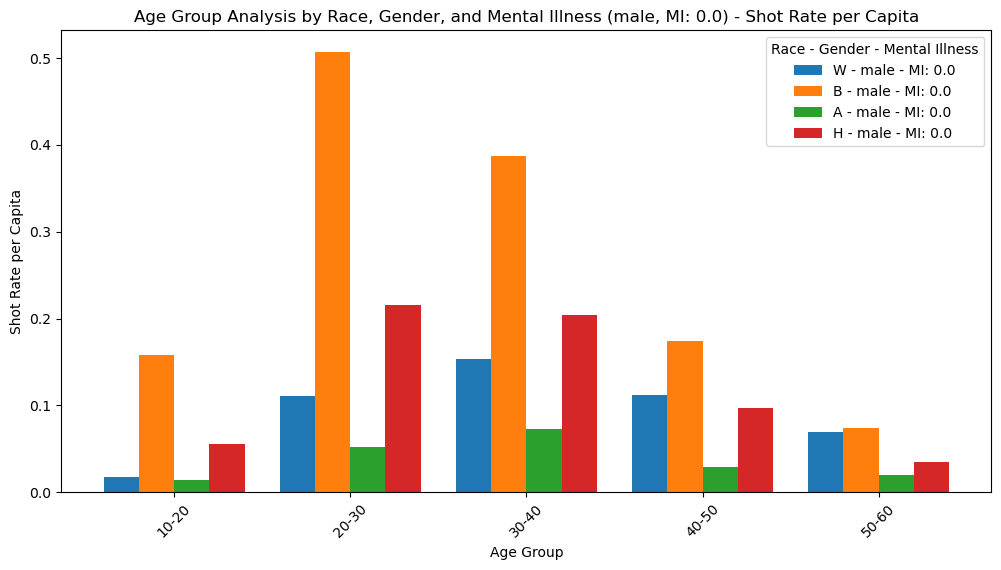

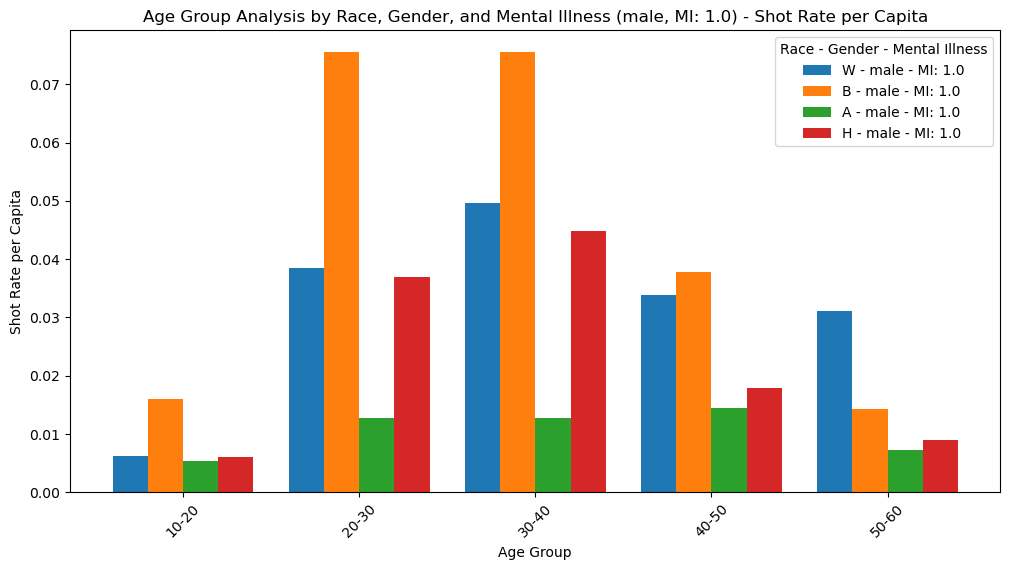

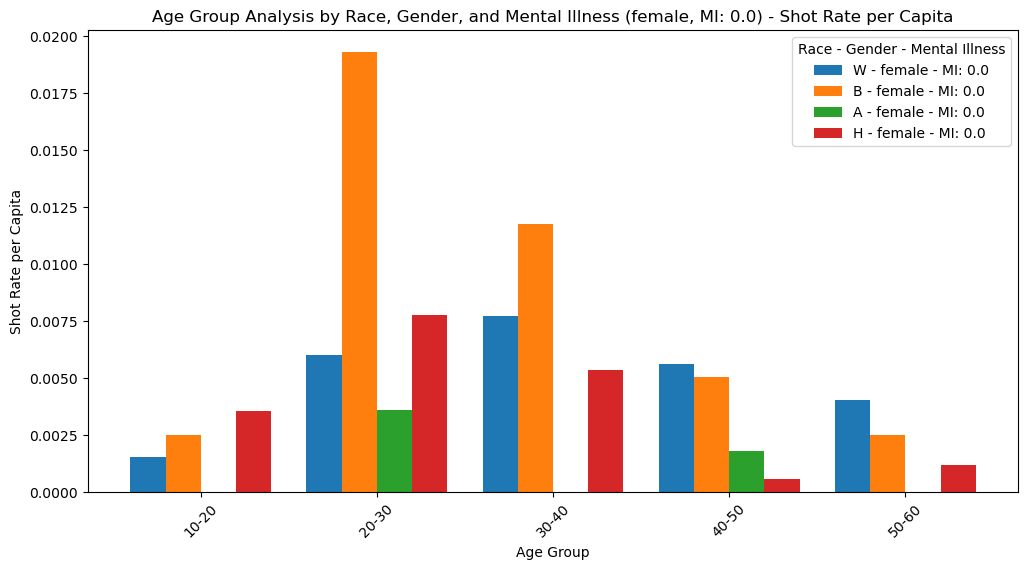

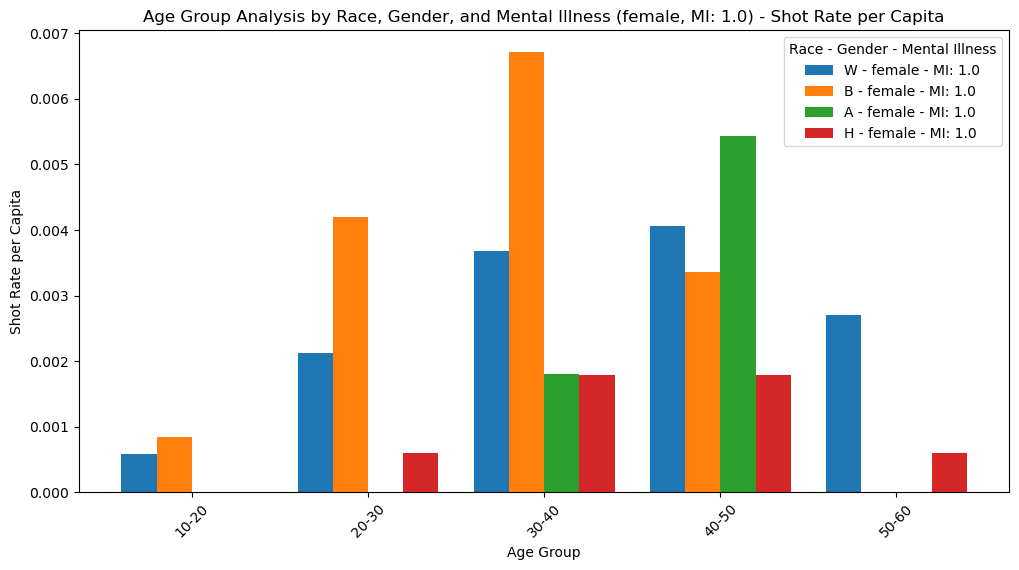

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
directory_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'
sheet_name = 'data1'
df = pd.read_excel(directory_path, sheet_name=sheet_name)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Filter the DataFrame to include only specified races (W, B, A, H)
selected_races = ['W', 'B', 'A', 'H']
df = df[df['race'].isin(selected_races)]

# Drop rows with missing 'age', 'race', 'gender', or 'mental_illness_related' values
df = df.dropna(subset=['race', 'age', 'gender', 'mental_illness_related'])

# Create age groups
age_bins = [10, 20, 30, 40, 50, 60]
age_labels = ['10-20', '20-30', '30-40', '40-50', '50-60']

# Cut the age data into age groups for each race category
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Count the number of individuals in each age group by race, gender, and mental illness classification
age_group_counts_by_race_gender_mental_illness = df.groupby(['race', 'gender', 'mental_illness_related', 'Age Group'])['name'].count().unstack().fillna(0)

# Calculate the shot rate per capita for each race, gender, and mental illness classification
shot_rate_by_race_gender_mental_illness = {race: age_group_counts_by_race_gender_mental_illness.loc[(race)].sum() / expected_counts[race] for race in selected_races}

# Print the shot rate per capita for each race, gender, and mental illness classification

# Create grouped bar charts for different genders and mental illness classifications
for gender in df['gender'].unique():
    for mental_illness in df['mental_illness_related'].unique():
        gender_df = df[(df['gender'] == gender) & (df['mental_illness_related'] == mental_illness)]

        # Create a grouped bar chart
        fig, ax = plt.subplots(figsize=(12, 6))
        width = 0.2
        x = range(len(age_labels))

        for i, race in enumerate(selected_races):
            age_group_counts = age_group_counts_by_race_gender_mental_illness.loc[(race, gender, mental_illness)]
            ax.bar([pos + width * i for pos in x], age_group_counts / expected_counts[race], width=width, label=f'{race} - {gender} - MI: {mental_illness}')

        ax.set_xticks([pos + width * (len(selected_races) - 1) / 2 for pos in x])
        ax.set_xticklabels(age_labels)
        plt.title(f'Age Group Analysis by Race, Gender, and Mental Illness ({gender}, MI: {mental_illness}) - Shot Rate per Capita')
        plt.xlabel('Age Group')
        plt.ylabel('Shot Rate per Capita')
        plt.legend(title='Race - Gender - Mental Illness')
        plt.xticks(rotation=45)
        plt.show()


D. Which demographic factors, such as race, age, gender, and mental health, are most commonly associated with police-involved shootings?

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
directory_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'
sheet_name = 'data1'
df = pd.read_excel(directory_path, sheet_name=sheet_name)

# Drop rows with missing 'race', 'age', and 'gender' values
df = df.dropna(subset=['race', 'age', 'gender'])

# Create age groups
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

# Cut the age data into age groups for each race category
df['Age Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# Count the number of individuals in each age group by race, gender, and mental illness classification
age_group_counts_by_race_gender_mental_illness = df.groupby(['race', 'gender', 'mental_illness_related', 'Age Group'])['name'].count().unstack().fillna(0)

# Calculate the combination with the highest count
most_likely_combination = age_group_counts_by_race_gender_mental_illness.stack().idxmax()
most_likely_count = age_group_counts_by_race_gender_mental_illness.stack().max()

# Print the most likely combination
print("Most Likely Combination of person who will be shot by the police :")
print("Race:", most_likely_combination[0])
print("Gender:", most_likely_combination[1])
print("Mental Illness:", most_likely_combination[2])
print("Age Group:", most_likely_combination[3])
print("Count:", most_likely_count)

Most Likely Combination of person who will be shot by the police :
Race: W
Gender: male
Mental Illness: 0.0
Age Group: 30-40
Count: 792


3. Incident Analysis Leading to the Shooting

A. Find the unique incidents like 'threat_type', 'flee_status', 'armed_with','body_camera' which led to shooting

In [32]:
import pandas as pd
from collections import Counter

# Define the column names you want to analyze
columns_to_analyze = ['threat_type', 'flee_status', 'armed_with','body_camera']
  
# File path to your Excel document
directory_path = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'
# Load your data into a DataFrame
df = pd.read_excel(directory_path)

# Initialize a dictionary to store word counts for each column
word_counts = {}

# Iterate through the specified columns
for column_name in columns_to_analyze:
    # Retrieve the data from the column and convert it to strings
    column_data = df[column_name].astype(str)

    # Tokenize the text and count the frequency of each word
    words = ' '.join(column_data).split()
    word_counts[column_name] = Counter(words)

# Print the words and their frequencies for each column
for column_name, word_count in word_counts.items():
    print(f"{column_name} Counts:")
    for word, count in word_count.items():
        print(f'{word}: {count}')
    print()

threat_type Counts:
nan: 48
point: 1640
threat: 2374
undetermined: 304
attack: 1292
move: 439
flee: 163
shoot: 2462
accident: 49

flee_status Counts:
nan: 1192
not: 4703
foot: 1136
car: 1403
other: 337

armed_with Counts:
nan: 211
gun: 5084
knife: 1470
undetermined: 347
other: 88
unarmed: 515
vehicle: 309
gun;vehicle: 38
replica: 288
blunt_object: 216
vehicle;gun: 15
vehicle;knife;other: 1
unknown: 138
knife;vehicle: 3
gun;knife: 35
blunt_object;knife: 2
other;gun: 4
knife;blunt_object: 2
blunt_object;blunt_object: 2
other;blunt_object;knife: 1
replica;vehicle: 1
replica;knife: 1

body_camera Counts:
nan: 1
0.0: 7424
1.0: 1346



B. Which races are most likely to confront the police and consequently face a higher risk of being shot?

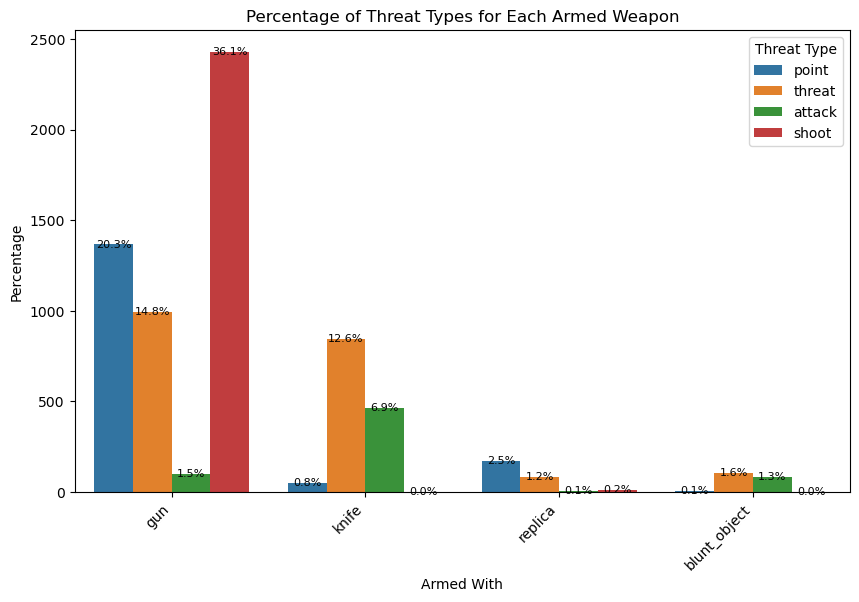

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx"
df = pd.read_excel(file_path)

# Filter data based on specific values
selected_weapons = ['gun', 'knife', 'replica', 'blunt_object']
selected_threats = ['point', 'threat', 'attack', 'shoot']

filtered_df = df[df['armed_with'].isin(selected_weapons) & df['threat_type'].isin(selected_threats)]

# Create a count plot for the filtered data with percentage labels
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="armed_with", hue="threat_type", data=filtered_df)
plt.xticks(rotation=45, ha='right')
plt.title("Percentage of Threat Types for Each Armed Weapon")
plt.xlabel("Armed With")
plt.ylabel("Percentage")
plt.legend(title='Threat Type')

# Add percentage labels on top of each bar
total = len(filtered_df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=8)

plt.show()


Race: B, Count: 1490, Percentage: 125.00%
Race: W, Count: 2955, Percentage: 57.20%
Race: H, Count: 988, Percentage: 58.99%
Race: A, Count: 104, Percentage: 18.84%


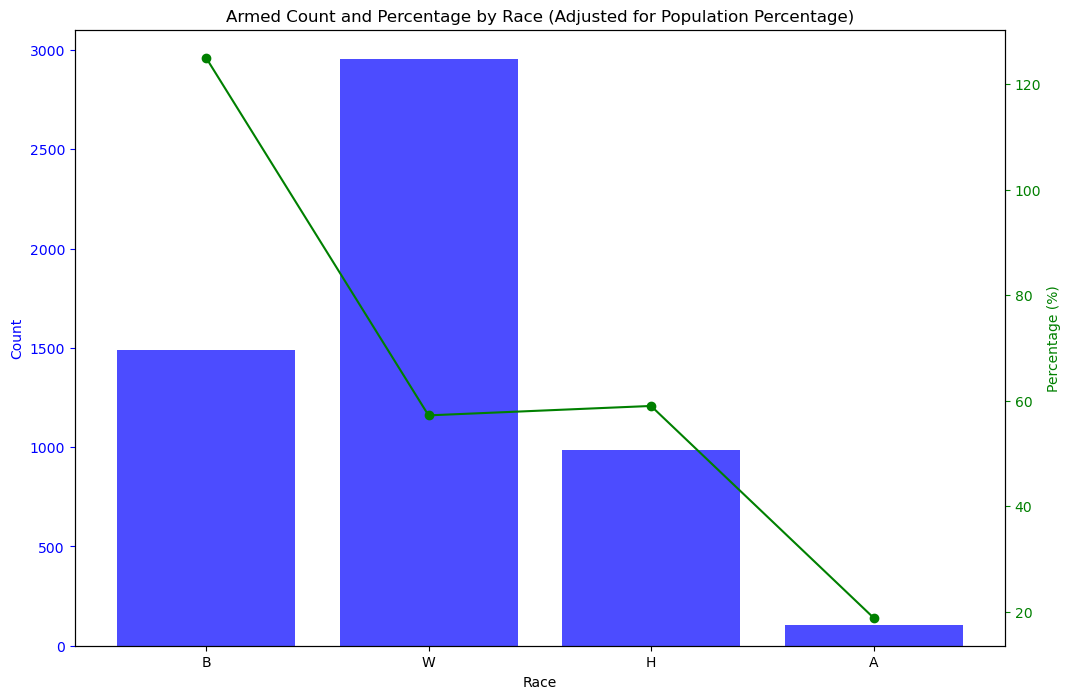

In [154]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx"
df = pd.read_excel(file_path)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Filter data based on specific values
selected_weapons = ['gun', 'knife', 'replica', 'blunt_object']
selected_threats = ['point', 'threat', 'attack', 'shoot']
selected_races = ['B', 'W', 'H', 'A']

filtered_df = df[df['armed_with'].isin(selected_weapons) & df['threat_type'].isin(selected_threats) & df['race'].isin(selected_races)]

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Calculate the armed count and percentage for each race, considering population percentage
armed_counts = {race: filtered_df[filtered_df['race'] == race].shape[0] for race in selected_races}
armed_percentages = {race: armed_counts[race] / expected_counts[race] * 100 for race in selected_races}

# Print count and percentage for each race
for race in selected_races:
    print(f"Race: {race}, Count: {armed_counts[race]}, Percentage: {armed_percentages[race]:.2f}%")

# Create a bar graph for armed count and percentage by race
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot counts
ax1.bar(selected_races, armed_counts.values(), color='blue', alpha=0.7, label='Count')
ax1.set_xlabel('Race')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title('Armed Count and Percentage by Race (Adjusted for Population Percentage)')

# Create a second y-axis to plot percentages
ax2 = ax1.twinx()
ax2.plot(selected_races, armed_percentages.values(), color='green', marker='o', label='Percentage')
ax2.set_ylabel('Percentage (%)', color='green')
ax2.tick_params('y', colors='green')

# Display the graph
plt.show()


Race: B, Count: 1232, Percentage: 103.36%
Race: W, Count: 2220, Percentage: 42.97%
Race: H, Count: 674, Percentage: 40.24%
Race: A, Count: 61, Percentage: 11.05%


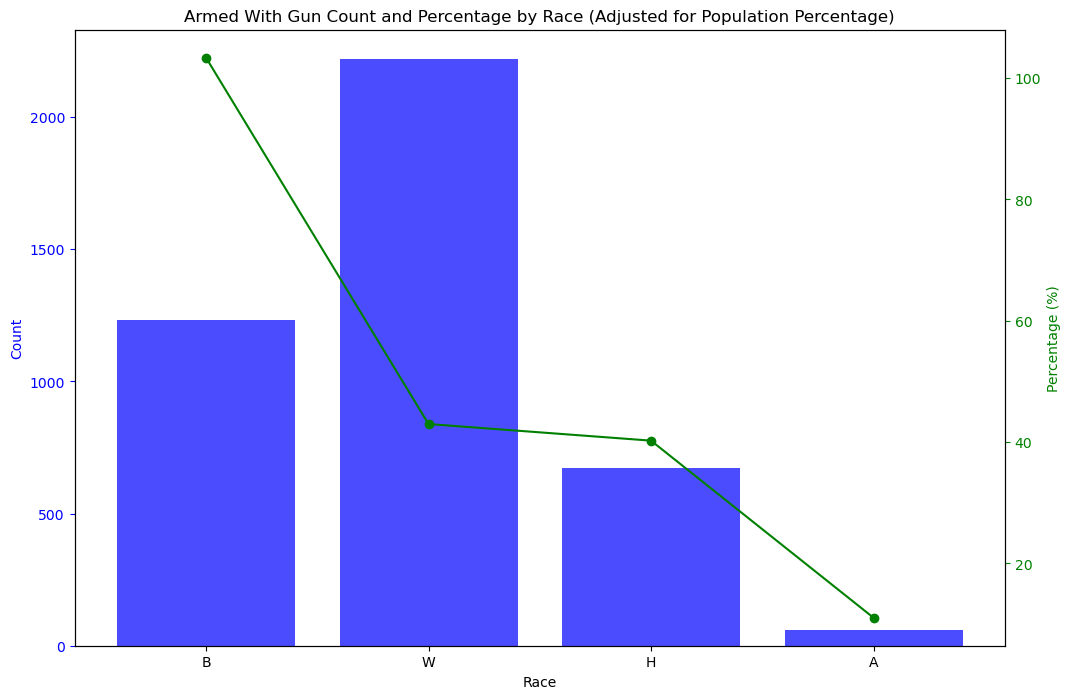

In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx"
df = pd.read_excel(file_path)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Filter data based on specific values
selected_weapon = 'gun'
selected_races = ['B', 'W', 'H', 'A']

filtered_df = df[(df['armed_with'] == selected_weapon) & df['race'].isin(selected_races)]

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Calculate the armed count and percentage for each race, considering population percentage
armed_counts = {race: filtered_df[filtered_df['race'] == race].shape[0] for race in selected_races}
armed_percentages = {race: armed_counts[race] / expected_counts[race] * 100 for race in selected_races}

# Print count and percentage for each race
for race in selected_races:
    print(f"Race: {race}, Count: {armed_counts[race]}, Percentage: {armed_percentages[race]:.2f}%")

# Create a bar graph for armed count and percentage by race (armed with gun)
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot counts
ax1.bar(selected_races, armed_counts.values(), color='blue', alpha=0.7, label='Count')
ax1.set_xlabel('Race')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title(f'Armed With {selected_weapon.capitalize()} Count and Percentage by Race (Adjusted for Population Percentage)')

# Create a second y-axis to plot percentages
ax2 = ax1.twinx()
ax2.plot(selected_races, armed_percentages.values(), color='green', marker='o', label='Percentage')
ax2.set_ylabel('Percentage (%)', color='green')
ax2.tick_params('y', colors='green')

# Display the graph
plt.show()

Race: B, Count: 264, Percentage: 22.15%
Race: W, Count: 623, Percentage: 12.06%
Race: H, Count: 278, Percentage: 16.60%
Race: A, Count: 43, Percentage: 7.79%


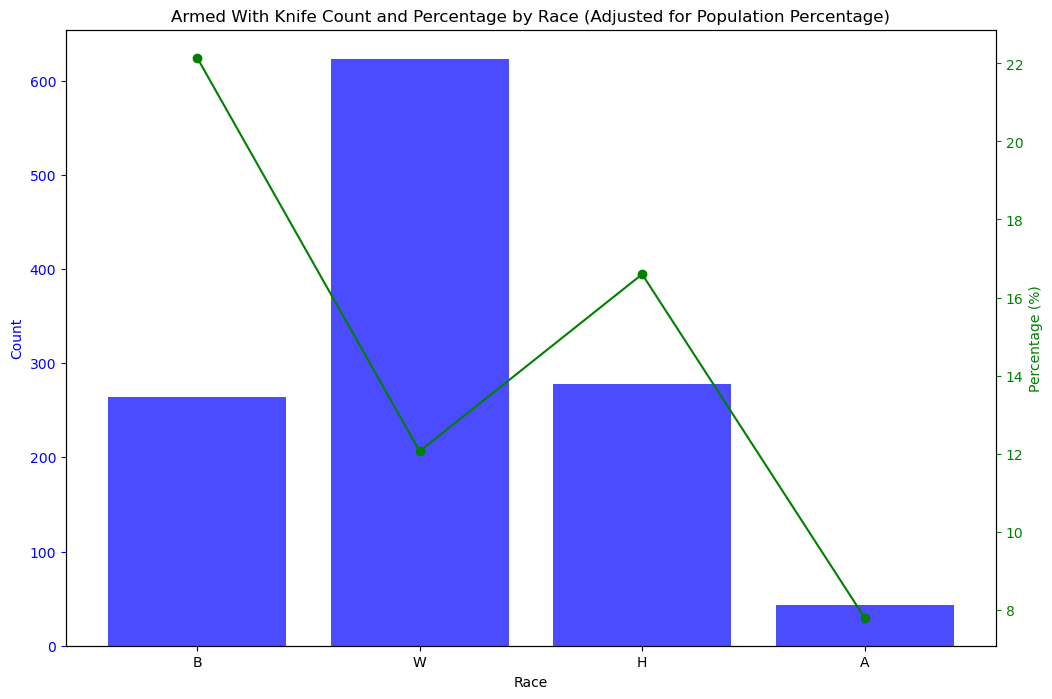

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx"
df = pd.read_excel(file_path)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Filter data based on specific values
selected_weapon = 'knife'
selected_races = ['B', 'W', 'H', 'A']

filtered_df = df[(df['armed_with'] == selected_weapon) & df['race'].isin(selected_races)]

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Calculate the armed count and percentage for each race, considering population percentage
armed_counts = {race: filtered_df[filtered_df['race'] == race].shape[0] for race in selected_races}
armed_percentages = {race: armed_counts[race] / expected_counts[race] * 100 for race in selected_races}

# Print count and percentage for each race
for race in selected_races:
    print(f"Race: {race}, Count: {armed_counts[race]}, Percentage: {armed_percentages[race]:.2f}%")

# Create a bar graph for armed count and percentage by race (armed with a knife)
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot counts
ax1.bar(selected_races, armed_counts.values(), color='blue', alpha=0.7, label='Count')
ax1.set_xlabel('Race')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title(f'Armed With {selected_weapon.capitalize()} Count and Percentage by Race (Adjusted for Population Percentage)')

# Create a second y-axis to plot percentages
ax2 = ax1.twinx()
ax2.plot(selected_races, armed_percentages.values(), color='green', marker='o', label='Percentage')
ax2.set_ylabel('Percentage (%)', color='green')
ax2.tick_params('y', colors='green')

# Display the graph
plt.show()


Race: B, Count: 1490, Percentage: 125.00%
Race: W, Count: 2955, Percentage: 57.20%
Race: H, Count: 988, Percentage: 58.99%
Race: A, Count: 104, Percentage: 18.84%


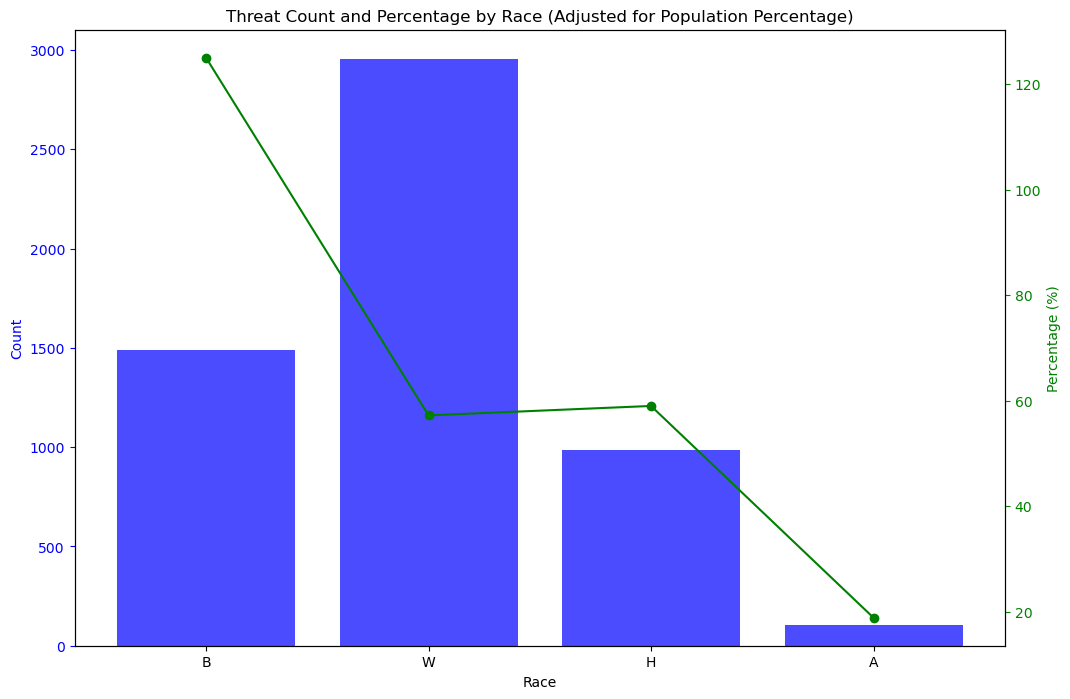

In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx"
df = pd.read_excel(file_path)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Filter data based on specific values
selected_weapons = ['gun', 'knife', 'replica', 'blunt_object']
selected_threats = ['point', 'threat', 'attack', 'shoot']
selected_races = ['B', 'W', 'H', 'A']

filtered_df = df[df['armed_with'].isin(selected_weapons) & df['threat_type'].isin(selected_threats) & df['race'].isin(selected_races)]

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Calculate the threat count and percentage for each race, considering population percentage
threat_counts = {race: filtered_df[filtered_df['race'] == race].shape[0] for race in selected_races}
threat_percentages = {race: threat_counts[race] / expected_counts[race] * 100 for race in selected_races}

# Print count and percentage for each race
for race in selected_races:
    print(f"Race: {race}, Count: {threat_counts[race]}, Percentage: {threat_percentages[race]:.2f}%")

# Create a bar graph for threat count and percentage by race
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot counts
ax1.bar(selected_races, threat_counts.values(), color='blue', alpha=0.7, label='Count')
ax1.set_xlabel('Race')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title('Threat Count and Percentage by Race (Adjusted for Population Percentage)')

# Create a second y-axis to plot percentages
ax2 = ax1.twinx()
ax2.plot(selected_races, threat_percentages.values(), color='green', marker='o', label='Percentage')
ax2.set_ylabel('Percentage (%)', color='green')
ax2.tick_params('y', colors='green')

# Display the graph
plt.show()


Race: B, Count: 650, Percentage: 54.53%
Race: W, Count: 1007, Percentage: 19.49%
Race: H, Count: 321, Percentage: 19.16%
Race: A, Count: 28, Percentage: 5.07%


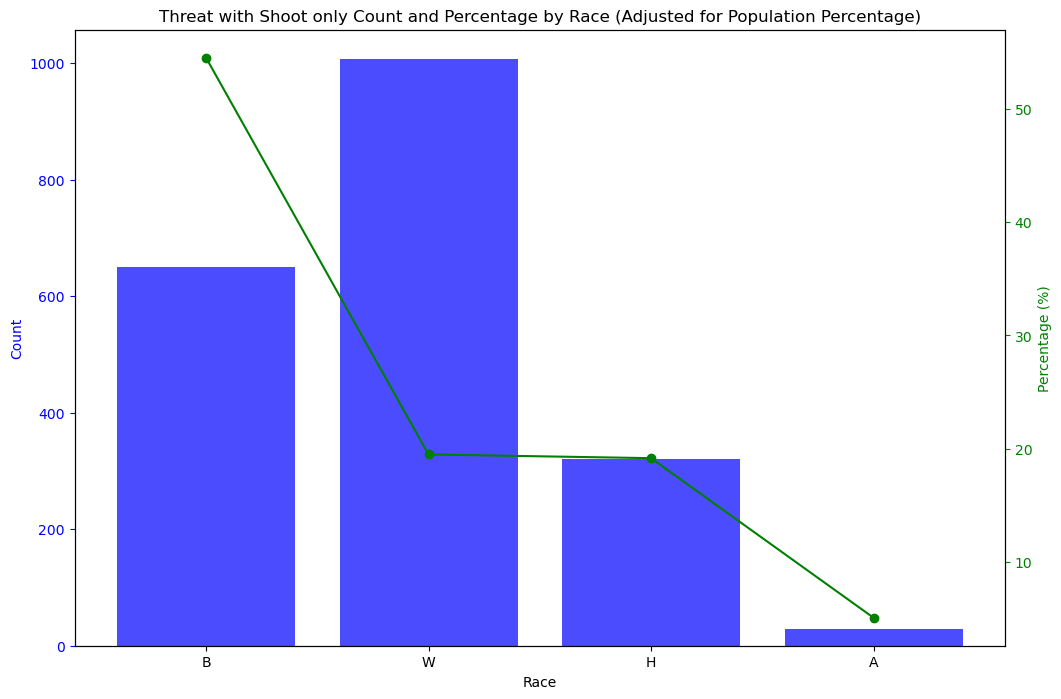

In [160]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx"
df = pd.read_excel(file_path)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Filter data based on specific values
selected_weapons = ['gun', 'knife', 'replica', 'blunt_object']
selected_threats = ['shoot']
selected_races = ['B', 'W', 'H', 'A']

filtered_df = df[df['armed_with'].isin(selected_weapons) & df['threat_type'].isin(selected_threats) & df['race'].isin(selected_races)]

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Calculate the threat count and percentage for each race, considering population percentage
threat_counts = {race: filtered_df[filtered_df['race'] == race].shape[0] for race in selected_races}
threat_percentages = {race: threat_counts[race] / expected_counts[race] * 100 for race in selected_races}

# Print count and percentage for each race
for race in selected_races:
    print(f"Race: {race}, Count: {threat_counts[race]}, Percentage: {threat_percentages[race]:.2f}%")

# Create a bar graph for threat count and percentage by race
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot counts
ax1.bar(selected_races, threat_counts.values(), color='blue', alpha=0.7, label='Count')
ax1.set_xlabel('Race')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title('Threat with Shoot only Count and Percentage by Race (Adjusted for Population Percentage)')

# Create a second y-axis to plot percentages
ax2 = ax1.twinx()
ax2.plot(selected_races, threat_percentages.values(), color='green', marker='o', label='Percentage')
ax2.set_ylabel('Percentage (%)', color='green')
ax2.tick_params('y', colors='green')

# Display the graph
plt.show()


Race: B, Count: 386, Percentage: 32.38%
Race: W, Count: 852, Percentage: 16.49%
Race: H, Count: 344, Percentage: 20.54%
Race: A, Count: 37, Percentage: 6.70%


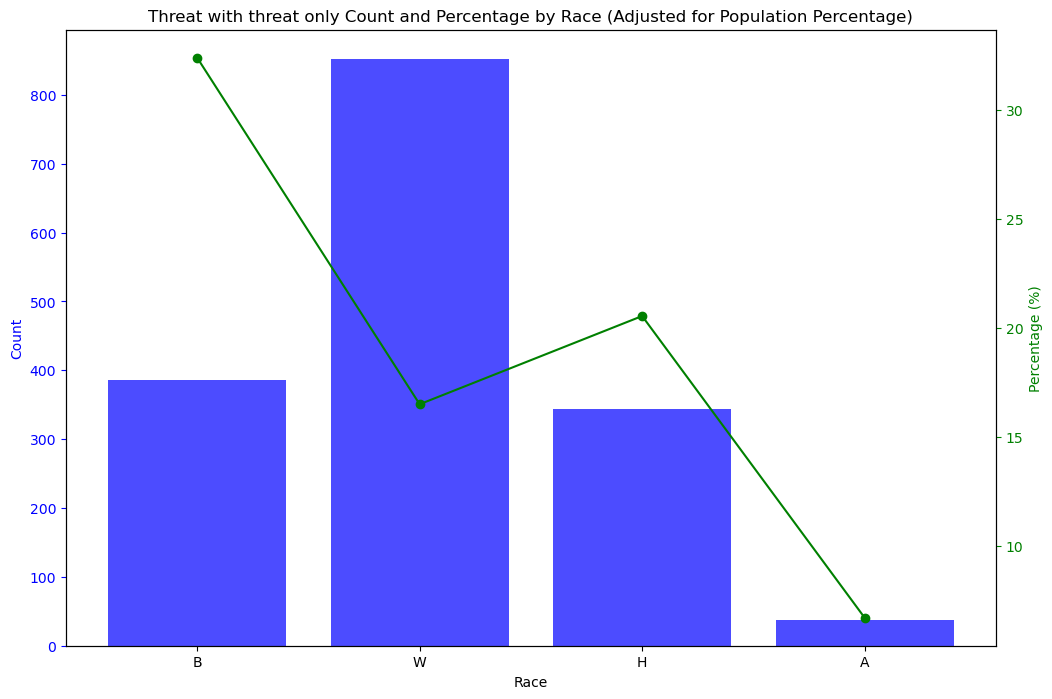

In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx"
df = pd.read_excel(file_path)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Filter data based on specific values
selected_weapons = ['gun', 'knife', 'replica', 'blunt_object']
selected_threats = ['threat']
selected_races = ['B', 'W', 'H', 'A']

filtered_df = df[df['armed_with'].isin(selected_weapons) & df['threat_type'].isin(selected_threats) & df['race'].isin(selected_races)]

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Calculate the threat count and percentage for each race, considering population percentage
threat_counts = {race: filtered_df[filtered_df['race'] == race].shape[0] for race in selected_races}
threat_percentages = {race: threat_counts[race] / expected_counts[race] * 100 for race in selected_races}

# Print count and percentage for each race
for race in selected_races:
    print(f"Race: {race}, Count: {threat_counts[race]}, Percentage: {threat_percentages[race]:.2f}%")

# Create a bar graph for threat count and percentage by race
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot counts
ax1.bar(selected_races, threat_counts.values(), color='blue', alpha=0.7, label='Count')
ax1.set_xlabel('Race')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title('Threat with threat only Count and Percentage by Race (Adjusted for Population Percentage)')

# Create a second y-axis to plot percentages
ax2 = ax1.twinx()
ax2.plot(selected_races, threat_percentages.values(), color='green', marker='o', label='Percentage')
ax2.set_ylabel('Percentage (%)', color='green')
ax2.tick_params('y', colors='green')

# Display the graph
plt.show()


Race: B, Count: 297, Percentage: 24.92%
Race: W, Count: 828, Percentage: 16.03%
Race: H, Count: 196, Percentage: 11.70%
Race: A, Count: 18, Percentage: 3.26%


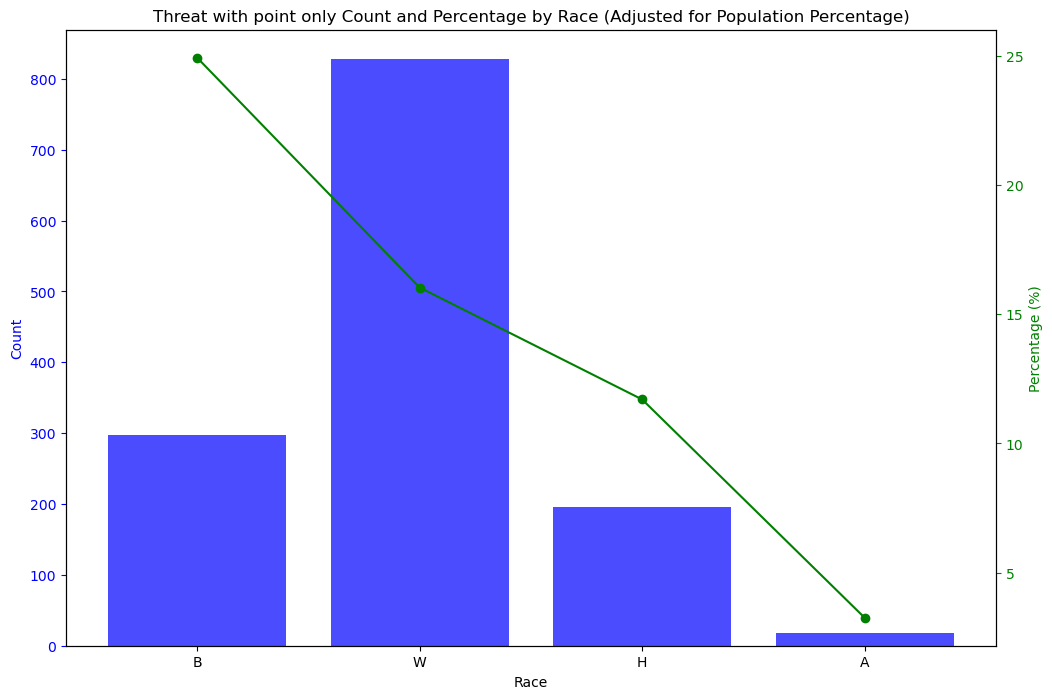

In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx"
df = pd.read_excel(file_path)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Filter data based on specific values
selected_weapons = ['gun', 'knife', 'replica', 'blunt_object']
selected_threats = ['point']
selected_races = ['B', 'W', 'H', 'A']

filtered_df = df[df['armed_with'].isin(selected_weapons) & df['threat_type'].isin(selected_threats) & df['race'].isin(selected_races)]

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Calculate the threat count and percentage for each race, considering population percentage
threat_counts = {race: filtered_df[filtered_df['race'] == race].shape[0] for race in selected_races}
threat_percentages = {race: threat_counts[race] / expected_counts[race] * 100 for race in selected_races}

# Print count and percentage for each race
for race in selected_races:
    print(f"Race: {race}, Count: {threat_counts[race]}, Percentage: {threat_percentages[race]:.2f}%")

# Create a bar graph for threat count and percentage by race
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot counts
ax1.bar(selected_races, threat_counts.values(), color='blue', alpha=0.7, label='Count')
ax1.set_xlabel('Race')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title('Threat with point only Count and Percentage by Race (Adjusted for Population Percentage)')

# Create a second y-axis to plot percentages
ax2 = ax1.twinx()
ax2.plot(selected_races, threat_percentages.values(), color='green', marker='o', label='Percentage')
ax2.set_ylabel('Percentage (%)', color='green')
ax2.tick_params('y', colors='green')

# Display the graph
plt.show()


Race: B, Count: 157, Percentage: 13.17%
Race: W, Count: 268, Percentage: 5.19%
Race: H, Count: 127, Percentage: 7.58%
Race: A, Count: 21, Percentage: 3.80%


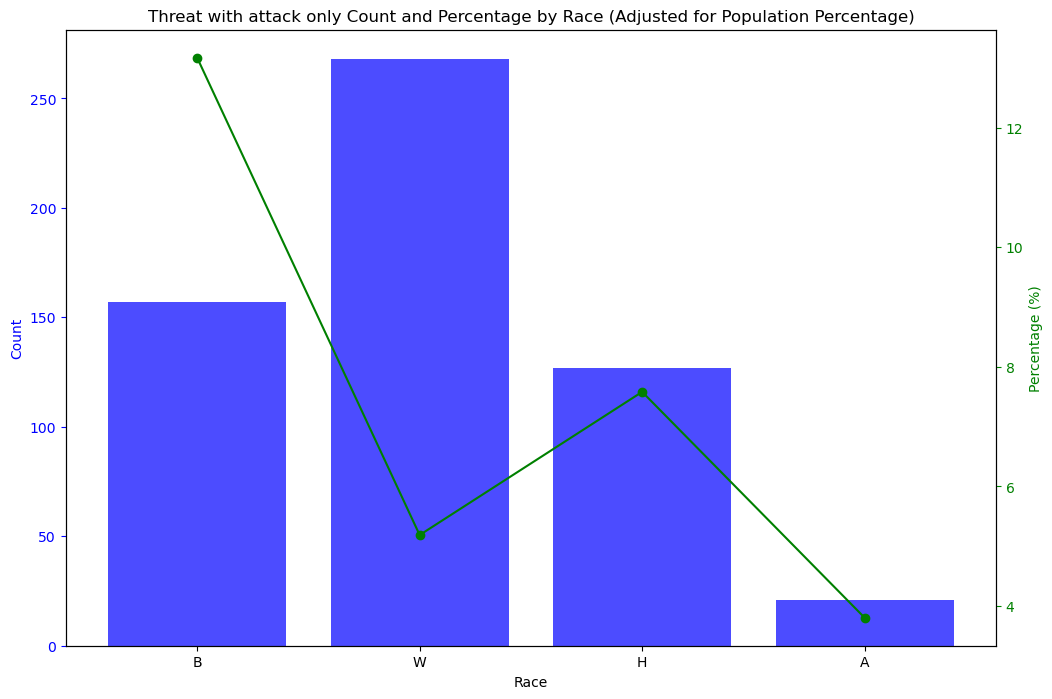

In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
file_path = r"D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx"
df = pd.read_excel(file_path)

# Define the population percentages for each race
population_percentages = {'W': 58.9, 'B': 13.6, 'A': 6.3, 'H': 19.1}

# Filter data based on specific values
selected_weapons = ['gun', 'knife', 'replica', 'blunt_object']
selected_threats = ['attack']
selected_races = ['B', 'W', 'H', 'A']

filtered_df = df[df['armed_with'].isin(selected_weapons) & df['threat_type'].isin(selected_threats) & df['race'].isin(selected_races)]

# Calculate the expected number of individuals in the dataset based on population percentage
expected_counts = {race: int(len(df) * (percentage / 100)) for race, percentage in population_percentages.items()}

# Calculate the threat count and percentage for each race, considering population percentage
threat_counts = {race: filtered_df[filtered_df['race'] == race].shape[0] for race in selected_races}
threat_percentages = {race: threat_counts[race] / expected_counts[race] * 100 for race in selected_races}

# Print count and percentage for each race
for race in selected_races:
    print(f"Race: {race}, Count: {threat_counts[race]}, Percentage: {threat_percentages[race]:.2f}%")

# Create a bar graph for threat count and percentage by race
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot counts
ax1.bar(selected_races, threat_counts.values(), color='blue', alpha=0.7, label='Count')
ax1.set_xlabel('Race')
ax1.set_ylabel('Count', color='blue')
ax1.tick_params('y', colors='blue')
ax1.set_title('Threat with attack only Count and Percentage by Race (Adjusted for Population Percentage)')

# Create a second y-axis to plot percentages
ax2 = ax1.twinx()
ax2.plot(selected_races, threat_percentages.values(), color='green', marker='o', label='Percentage')
ax2.set_ylabel('Percentage (%)', color='green')
ax2.tick_params('y', colors='green')

# Display the graph
plt.show()


4. Did the police employ excessive force, and was this excessive force disproportionately directed towards 
any specific racial group?

In [1]:
import pandas as pd

# Load the data into a DataFrame
data = r'D:\General\UMass Dartmouth\Subjects\Fall 2023 - MTH 522 - Mathematical Statistics\Project 2\Police Shootings.xlsx'

df = pd.read_excel(data)

# Function to determine excessive force
def justified_force(row):
    valid_threat_types = ["point", "threat", "attack", "shoot"]

    if row["threat_type"] in valid_threat_types:
        return True
    return False

# Apply the function to the DataFrame
df["justified_force"] = df.apply(justified_force, axis=1)

# Filter the DataFrame to include only specified races (B, W, H, A)
selected_races = ['B', 'W', 'H', 'A']
filtered_df = df[df['race'].isin(selected_races)]

# Display the filtered DataFrame with the excessive force column
print(filtered_df[["id", "date", "race", "justified_force"]])


          id       date race  justified_force
1      252.0 2015-03-29    B             True
2      618.0 2015-07-07    W             True
4     7422.0 2021-12-11    B             True
5     1149.0 2016-01-05    H            False
6     3055.0 2017-10-22    H            False
...      ...        ...  ...              ...
8766  5442.0 2020-01-28    H             True
8767  1090.0 2015-12-14    W            False
8768  1100.0 2015-12-18    W             True
8769  1115.0 2015-12-22    W             True
8770  1119.0 2015-12-21    W             True

[7225 rows x 4 columns]
